In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import copy

In [2]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

scanpy==1.8.2 anndata==0.7.8 umap==0.5.2 numpy==1.19.2 scipy==1.5.2 pandas==1.1.3 scikit-learn==0.23.2 statsmodels==0.12.0 python-igraph==0.9.9 pynndescent==0.5.6


In [34]:
adata = sc.read_10x_mtx(
    'data/filtered_gene/',  # the directory with the `.mtx` file
    var_names='gene_ids',                # use gene ids for the variable names (variables-axis index)
    cache=True)                              # write a cache file for faster subsequent reading
#adata2 = sc.read_10x_mtx('data/SRR9990688/', var_names='gene_ids', cache=True)
#adata3 = sc.read_10x_mtx('data/SRR9990689/', var_names='gene_ids', cache=True)
#adata4 = sc.read_10x_mtx('data/SRR9990690/', var_names='gene_ids', cache=True)
#adata5 = sc.read_10x_mtx('data/SRR9990791/', var_names='gene_ids', cache=True)
#adata6 = sc.read_10x_mtx('data/SRR9990792/', var_names='gene_ids', cache=True)
#adata7 = sc.read_10x_mtx('data/SRR9990793/', var_names='gene_ids', cache=True)
#adata8 = sc.read_10x_mtx('data/SRR9990794/', var_names='gene_ids', cache=True)

... reading from cache file cache/data-filtered_gene-matrix.h5ad


In [35]:
adata

AnnData object with n_obs × n_vars = 2004 × 54
    var: 'gene_symbols'

normalizing counts per cell
    finished (0:00:00)


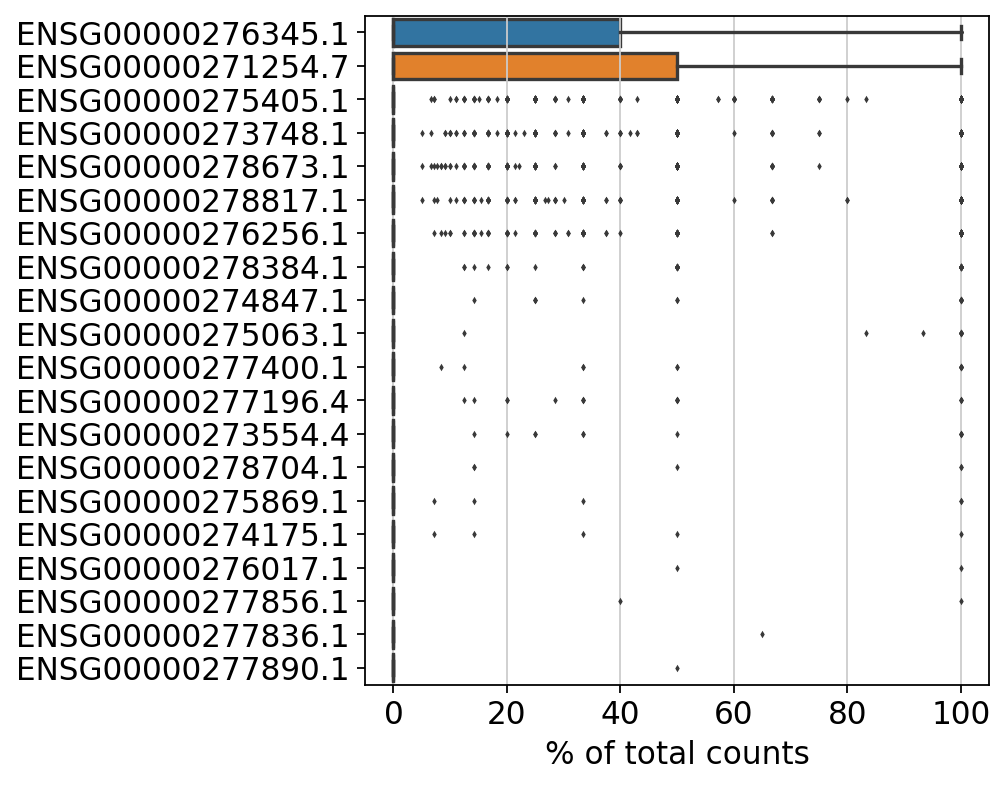

In [36]:
sc.pl.highest_expr_genes(adata, n_top=20, )

In [37]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

filtered out 2004 cells that have less than 200 genes expressed
filtered out 54 genes that are detected in less than 3 cells


In [38]:
adata
#adata.var['mt'] = adata.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
#sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

AnnData object with n_obs × n_vars = 0 × 0
    obs: 'n_genes'
    var: 'gene_symbols', 'n_cells'

KeyError: 'n_genes_by_counts'

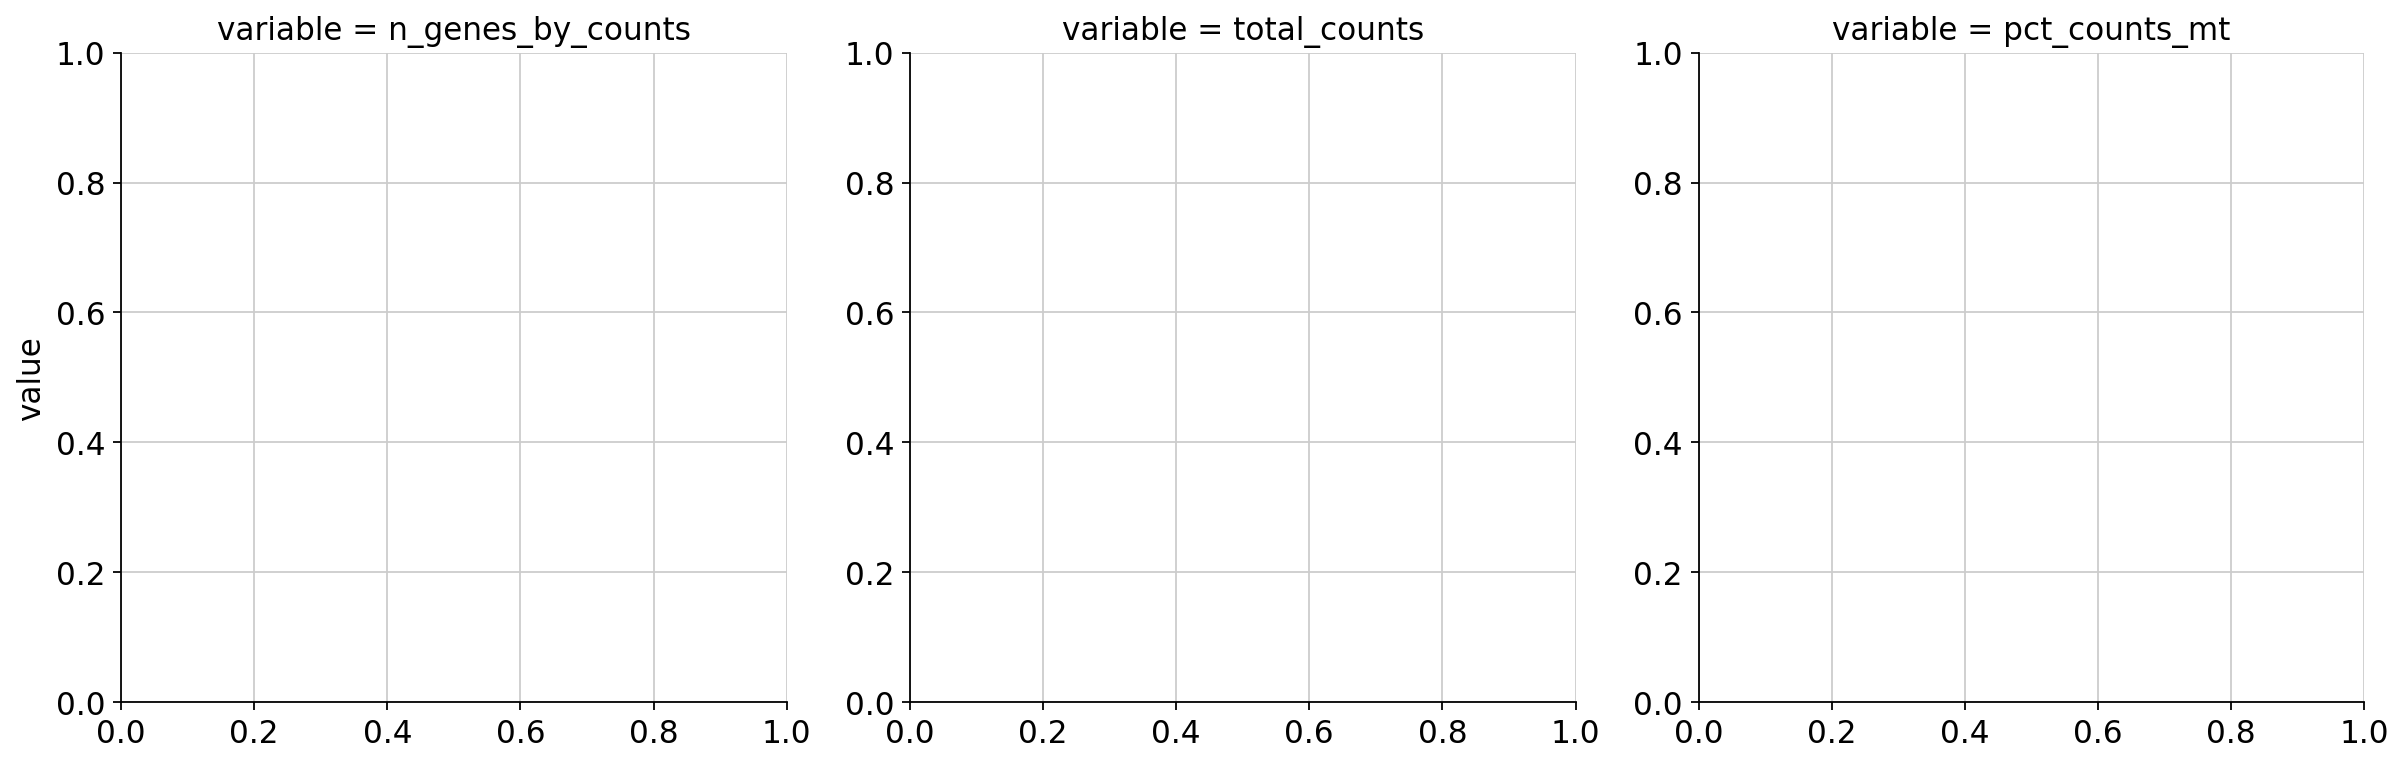

In [9]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

In [ ]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')



In [ ]:
adata = adata[adata.obs.n_genes_by_counts < 2500, :]
adata = adata[adata.obs.pct_counts_mt < 5, :]

In [ ]:
sc.pp.normalize_total(adata, target_sum=1e4)

In [ ]:
sc.pp.log1p(adata)

In [ ]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

In [ ]:
sc.pl.highly_variable_genes(adata)

In [ ]:
adata.raw = adata

In [ ]:
adata = adata[:, adata.var.highly_variable]

In [ ]:
sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt'])

In [ ]:
sc.pp.scale(adata, max_value=10)

In [ ]:
sc.tl.pca(adata, svd_solver='arpack')

In [ ]:
sc.pl.pca(adata, color='FTL') #CST3
sc.pl.pca(adata, color='CST3')

In [ ]:
# louvain
#sc.tl.louvain(adata)

In [ ]:
sc.pl.pca_variance_ratio(adata, log=True)

In [ ]:
adata.write(results_file)

In [ ]:
adata
bdata = copy.deepcopy(adata)
cdata = copy.deepcopy(adata)

In [ ]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40) 

In [ ]:
#tl.paga(adata)
#pl.paga(adata, plot=False)  # remove `plot=False` if you want to see the coarse-grained graph
#tl.umap(adata, init_pos='paga')

In [ ]:
sc.tl.umap(adata)

In [ ]:
sc.pl.umap(adata, color=['CST3', 'NKG7', 'PPBP'])

In [ ]:
sc.pl.umap(adata, color=['CST3', 'NKG7', 'PPBP'], use_raw=False)

In [ ]:
#n_neighbors:
#The size of local neighborhood (in terms of number of neighboring data points) used for 
#manifold approximation.
#Larger values result in more global views of the manifold, 
#while smaller values result in more local data being preserved.

sc.pp.neighbors(bdata, n_neighbors=100, n_pcs=40) #initial: 10
sc.tl.umap(bdata)
sc.pl.umap(bdata, color=['CST3', 'NKG7', 'PPBP'], use_raw=False) 

In [ ]:
#n_pcs:
#Use this many PCs

sc.pp.neighbors(cdata, n_neighbors=10, n_pcs=4) #initial: 40
sc.tl.umap(cdata)
sc.pl.umap(cdata, color=['CST3', 'NKG7', 'PPBP'], use_raw=False) 

In [ ]:
ddata = copy.deepcopy(adata)
sc.tl.leiden(adata)

In [ ]:
#Resolution: A parameter value controlling the coarseness of the clustering. 
#Higher values lead to more clusters. 
#Set to None if overriding partition_type to one that doesn’t accept a resolution_parameter.

sc.tl.leiden(ddata, resolution = 3) #initial: 1

In [ ]:
sc.pl.umap(adata, color=['leiden', 'CST3', 'NKG7'])

In [ ]:
sc.pl.umap(ddata, color=['leiden', 'CST3', 'NKG7'])

In [ ]:
adata.write(results_file)

In [ ]:
sc.tl.rank_genes_groups(adata, 'leiden', method='t-test')
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

In [ ]:
sc.settings.verbosity = 2  # reduce the verbosity

In [ ]:
sc.tl.rank_genes_groups(adata, 'leiden', method='wilcoxon')
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

In [ ]:
adata.write(results_file)

In [ ]:
sc.tl.rank_genes_groups(adata, 'leiden', method='logreg')
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

In [ ]:
marker_genes = ['IL7R', 'CD79A', 'MS4A1', 'CD8A', 'CD8B', 'LYZ', 'CD14',
                'LGALS3', 'S100A8', 'GNLY', 'NKG7', 'KLRB1',
                'FCGR3A', 'MS4A7', 'FCER1A', 'CST3', 'PPBP']

In [ ]:
adata = sc.read(results_file)

In [ ]:
pd.DataFrame(adata.uns['rank_genes_groups']['names']).head(5)

In [ ]:
result = adata.uns['rank_genes_groups']
groups = result['names'].dtype.names
pd.DataFrame(
    {group + '_' + key[:1]: result[key][group]
    for group in groups for key in ['names', 'pvals']}).head(5)

In [ ]:
sc.tl.rank_genes_groups(adata, 'leiden', groups=['0'], reference='1', method='wilcoxon')
sc.pl.rank_genes_groups(adata, groups=['0'], n_genes=20)

In [ ]:
sc.pl.rank_genes_groups_violin(adata, groups='0', n_genes=8)

In [ ]:
adata = sc.read(results_file)

In [ ]:
sc.pl.rank_genes_groups_violin(adata, groups='0', n_genes=8)

In [ ]:
sc.pl.violin(adata, ['CST3', 'NKG7', 'PPBP'], groupby='leiden')

In [ ]:
new_cluster_names = [
    'CD4 T', 'CD14 Monocytes',
    'B', 'CD8 T',
    'NK', 'FCGR3A Monocytes',
    'Dendritic', 'Megakaryocytes']
adata.rename_categories('leiden', new_cluster_names)

In [ ]:
sc.pl.umap(adata, color='leiden', legend_loc='on data', title='', frameon=False, save='.pdf')

In [ ]:
sc.pl.dotplot(adata, marker_genes, groupby='leiden');

In [ ]:
sc.pl.stacked_violin(adata, marker_genes, groupby='leiden', rotation=90);

In [ ]:
adata

In [ ]:
adata.write(results_file, compression='gzip')  # `compression='gzip'` saves disk space, but slows down writing and subsequent reading

In [ ]:
adata.raw.to_adata().write('./write/pbmc3k_withoutX.h5ad')

In [ ]:
# Export single fields of the annotation of observations
# adata.obs[['n_counts', 'louvain_groups']].to_csv(
#     './write/pbmc3k_corrected_louvain_groups.csv')

# Export single columns of the multidimensional annotation
# adata.obsm.to_df()[['X_pca1', 'X_pca2']].to_csv(
#     './write/pbmc3k_corrected_X_pca.csv')

# Or export everything except the data using `.write_csvs`.
# Set `skip_data=False` if you also want to export the data.
# adata.write_csvs(results_file[:-5], )